In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import unicodedata
import re
import json

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from prepare import remove_stopwords, basic_clean, tokenize, lemmatize
import env

### Explore Spam

In [2]:
# Load Spam data
url = env.get_db_url('spam_db')

In [3]:
query = 'SELECT * FROM spam'
df = pd.read_sql(query, url, index_col='id')

In [4]:
df.head()

label                                               text
id                                                         
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...

In [5]:
# Clean function for use on data
def clean(text):
    return remove_stopwords(lemmatize(tokenize(basic_clean(text))))

In [6]:
# Acquire text
all = ' '.join(df.text)
ham = ' '.join(df[df.label == 'ham'].text)
spam = ' '.join(df[df.label == 'spam'].text)

In [7]:
# Clean text
all = clean(all)
ham = clean(ham)
spam = clean(spam)

In [8]:
all

"go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry questionstd txt ratetc ' apply 08452810075over18 ' u dun say early hor u c already say nah ' think go usf life around though freemsg hey darling ' 3 week ' word back ' like fun still tb ok xxx std chgs send a150 rcv even brother like speak treat like aid patent per request ' melle melle oru minnaminunginte nurungu vettam ' ha set callertune caller press 9 copy friend callertune winner valued network customer selected receivea a900 prize reward claim call 09061701461 claim code kl341 valid 12 hour mobile 11 month u r entitled update latest colour mobile camera free call mobile update co free 08002986030 ' gonna home soon ' want talk stuff anymore tonight k ' cried enough today six chance win cash 100 20000 pound txt csh11 send 87575 cost 150pday 6days 16 tsandcs apply reply hl 4 info urgent 1 we

In [9]:
# Explore bigrams, trigrams, word clouds for ham and spam 

In [10]:
# Get word counts for the df
ham_freq = pd.Series(ham.split()).value_counts()
spam_freq = pd.Series(spam.split()).value_counts()
all_freq = pd.Series(all.split()).value_counts()

In [11]:
counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)

In [12]:
counts.columns = ['all', 'spam', 'ham']

In [13]:
counts = counts.fillna(0).apply(lambda s: s.astype(int))

In [14]:
counts.sort_values(by='all', ascending=False)

all  spam   ham
'        1871   127  1744
u        1214   160  1054
call      600   359   241
2         478   173   305
get       397    83   314
...       ...   ...   ...
harlem      1     0     1
harish      1     0     1
hari        1     0     1
hardest     1     0     1
zyada       1     0     1

[8835 rows x 3 columns]

In [15]:
# Create bigram/trigram lists
bi_ham = list(nltk.ngrams(ham.split(), 2))
tri_ham = list(nltk.ngrams(ham.split(), 3))

bi_spam = list(nltk.ngrams(spam.split(), 2))
tri_spam = list(nltk.ngrams(spam.split(), 3))

bi_all = list(nltk.ngrams(all.split(), 2))
tri_all = list(nltk.ngrams(all.split(), 3))

In [16]:
# Get counts and concat
bi_ham_count = pd.concat([pd.Series(bi_ham).value_counts()])
tri_ham_count = pd.concat([pd.Series(tri_ham).value_counts()])

bi_spam_count = pd.concat([pd.Series(bi_spam).value_counts()])
tri_spam_count = pd.concat([pd.Series(tri_spam).value_counts()])

bi_all_count = pd.concat([pd.Series(bi_all).value_counts()])
tri_all_count = pd.concat([pd.Series(tri_all).value_counts()])

In [17]:
bi_counts = (pd.concat([bi_ham_count, bi_spam_count, bi_all_count], axis=1)
               .set_axis(['ham', 'spam', 'all'], axis=1, inplace=False) 
             .fillna(0).apply(lambda s: s.astype(int)).sort_values(by='all', ascending=False))
tri_counts = (pd.concat([tri_ham_count, tri_spam_count, tri_all_count], axis=1)
               .set_axis(['ham', 'spam', 'all'], axis=1, inplace=False) 
             .fillna(0).apply(lambda s: s.astype(int)).sort_values(by='all', ascending=False))

In [18]:
bi_counts

ham  spam  all
please      call         9    44   53
sorry       '           52     0   52
'           '           50     1   52
call        later       52     0   52
'           call        45     0   45
...                    ...   ...  ...
www80488biz sm           0     1    0
mobile      contacted    0     1    0
fumbling    late         1     0    0
already     account      1     0    0
invited     money        1     0    0

[39033 rows x 3 columns]

In [19]:
tri_counts

ham  spam  all
'       call       later    41     0   41
sorry   '          call     38     0   38
prize   guaranteed call      0    21   21
u       wan        2        21     0   21
happy   new        year     19     0   19
...                        ...   ...  ...
slowly  guy        get       1     0    0
msg     win        newest    0     1    0
per     msg        win       0     1    0
college better     made      1     0    0
da      wah        okie      1     0    0

[48042 rows x 3 columns]

<AxesSubplot:>

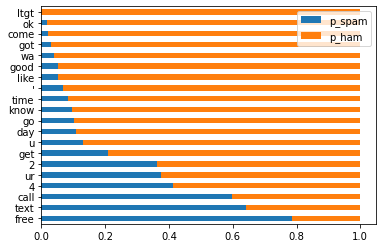

In [20]:
counts.assign(p_spam = counts.spam / counts['all'], p_ham = counts.ham / counts['all'])\
    .sort_values(by='all').tail(20)[['p_spam', 'p_ham']].sort_values(by='p_ham').plot.barh(stacked=True)

<AxesSubplot:>

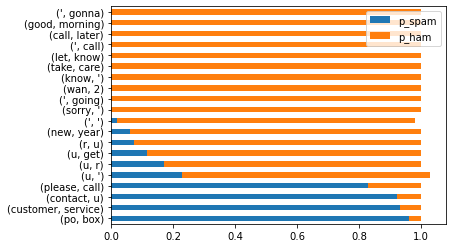

In [21]:
bi_counts.assign(p_spam = bi_counts.spam / bi_counts['all'], p_ham = bi_counts.ham / bi_counts['all'])\
    .sort_values(by='all').tail(20)[['p_spam', 'p_ham']].sort_values(by='p_ham').plot.barh(stacked=True)

<AxesSubplot:>

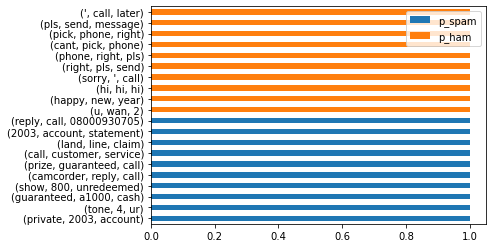

In [22]:
tri_counts.assign(p_spam = tri_counts.spam / tri_counts['all'], p_ham = tri_counts.ham / tri_counts['all'])\
    .sort_values(by='all').tail(20)[['p_spam', 'p_ham']].sort_values(by='p_ham').plot.barh(stacked=True)

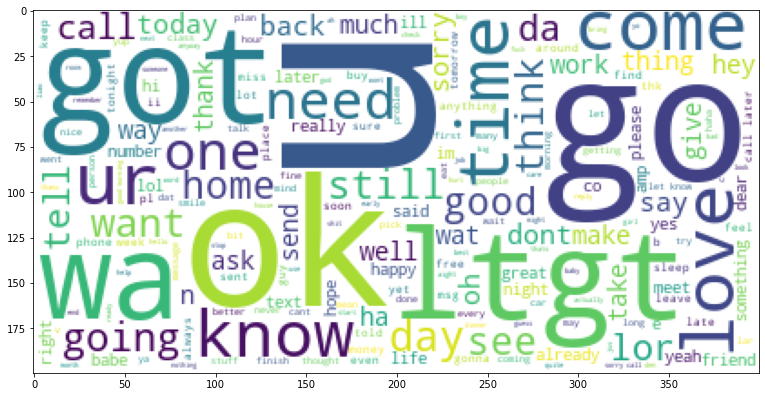

In [23]:
# Word Clouds
# Ham
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(ham)
plt.imshow(img)
plt.show()

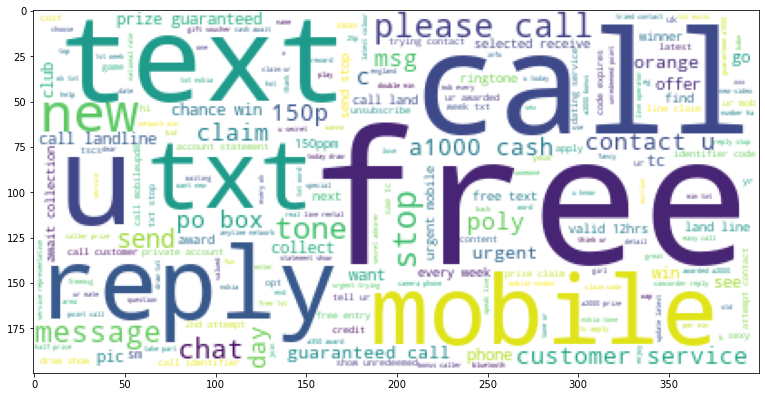

In [24]:
# Spam
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(spam)
plt.imshow(img)
plt.show()

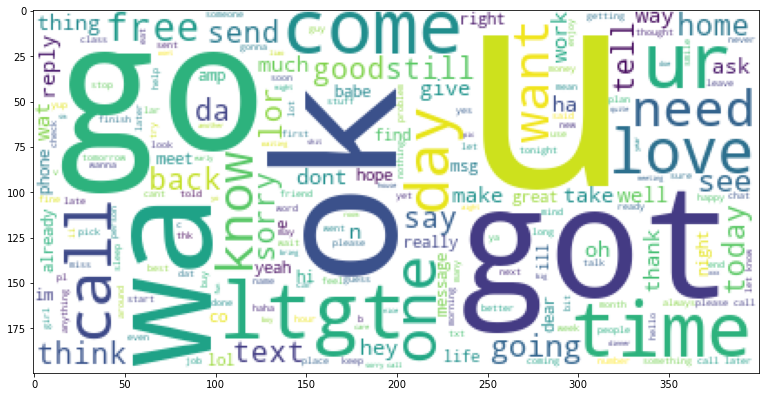

In [25]:
# All
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(all)
plt.imshow(img)
plt.show()

In [26]:
bi_ham = ['_'.join(bi) for bi in bi_ham]
bi_spam = ['_'.join(bi) for bi in bi_spam]
tri_ham = ['_'.join(bi) for bi in tri_ham]
tri_spam = ['_'.join(bi) for bi in tri_spam]

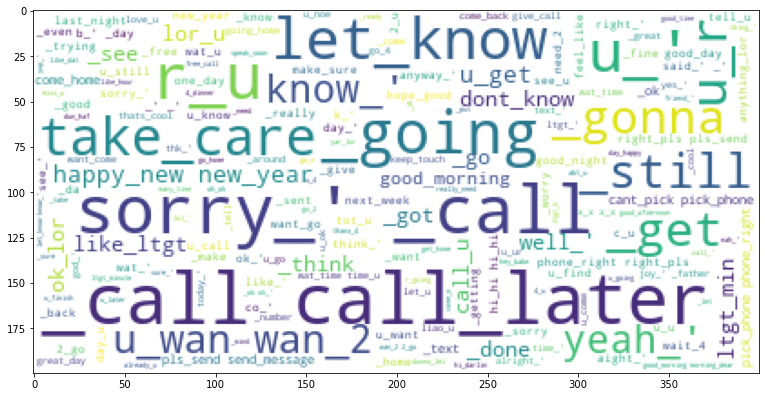

In [27]:
# Word Cloud on a bigram set (ham)
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(' '.join(bi_ham))
plt.imshow(img)
plt.show()

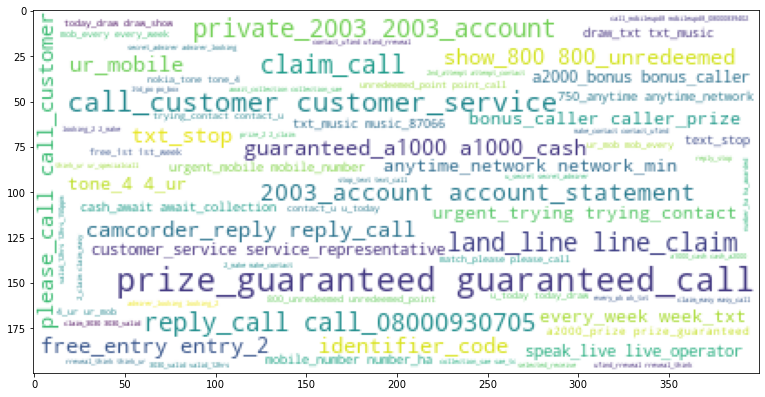

In [28]:
# Word Cloud on a bigram set spam
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(' '.join(bi_spam))
plt.imshow(img)
plt.show()

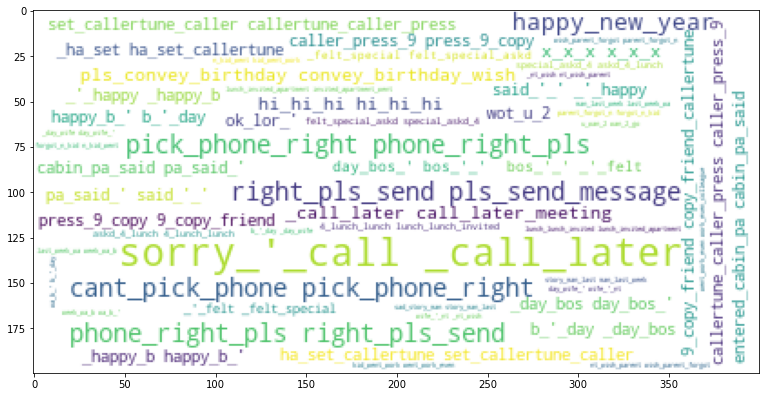

In [29]:
# Word Cloud on a trigram set ham
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(' '.join(tri_ham))
plt.imshow(img)
plt.show()

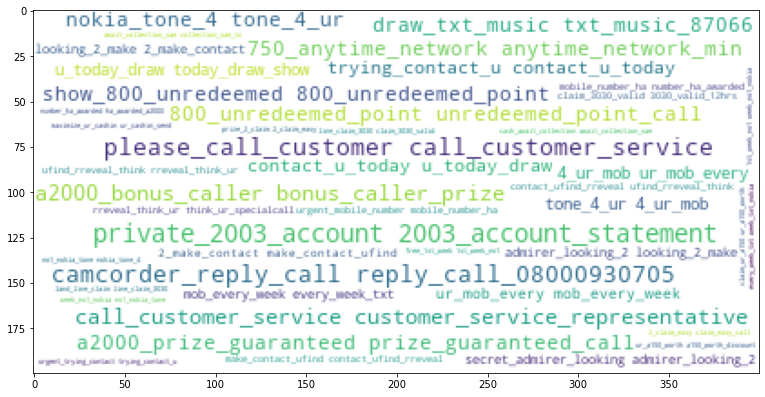

In [30]:
# Word Cloud on a trigram set spam
plt.figure(figsize=(13,7))
img = WordCloud(background_color='white').generate(' '.join(tri_spam))
plt.imshow(img)
plt.show()

In [31]:
# Overlap between bigrams for spam/ham
overlap = set(bi_ham).intersection(set(bi_spam))

In [32]:
overlap = list(overlap)

In [33]:
overlap

['day_today',
 'sent_ur',
 '3_week',
 'hi_babe',
 "'_talk",
 'u_please',
 "'_text",
 'hope_enjoyed',
 '4_1',
 'send_stop',
 'meal_u',
 'come_take',
 'u_get',
 "'_stuff",
 '6_u',
 'great_wa',
 'u_must',
 'u_call',
 'u_stop',
 "'_glad",
 "u_'",
 'thanks_good',
 'weekend_u',
 'please_call',
 'contact_u',
 'c_u',
 'oh_god',
 'u_txt',
 'missed_call',
 'u_free',
 'tomorrow_ur',
 'good_friend',
 'ill_send',
 'call_4',
 'term_condition',
 'like_fun',
 'someone_ha',
 'let_send',
 'u_win',
 'u_hi',
 'next_week',
 'ur_friend',
 "'_child",
 '2_use',
 "b_'",
 "ready_'",
 "hi_'",
 'hope_u',
 'u_u',
 'u_like',
 "time_'",
 'nothing_u',
 '26th_july',
 'free_message',
 'wanna_cum',
 'u_one',
 'stay_night',
 'tell_u',
 "notice_'",
 'u_baby',
 'get_u',
 'ur_fone',
 'txt_back',
 "'_forget",
 'know_someone',
 "'_true",
 'text_back',
 '2_c',
 "today_'",
 '4_ur',
 'message_call',
 '2_work',
 'u_use',
 'phone_send',
 'last_week',
 'game_send',
 'get_free',
 'enjoy_one',
 'u_receive',
 'wanna_play',
 'wanna_get

### Explore the blog articles and news articles

In [34]:
import acquire
import prepare

In [35]:
blogs = acquire.get_blog_articles()

In [36]:
blogs.columns

Index(['title', 'content', 'published'], dtype='object')

In [37]:
blogs = prepare.prep_data(blogs)

In [38]:
blogs.head()

title  \
0  Project Quest Info Session: IT Jumpstart on Ma...   
1  From Bootcamp to Bootcamp | A Military Appreci...   
2  Our Acquisition of the Rackspace Cloud Academy...   
3                  Learn to Code: HTML & CSS on 4/30   
4             Learn to Code: Python Workshop on 4/23   

                                            original     published  \
0  Join our grant partner Project Quest as they d...  May 11, 2022   
1  In honor of Military Appreciation Month, join ...  Apr 27, 2022   
2  Just about a year ago on April 16th, 2021 we a...  Apr 14, 2022   
3  HTML & CSS are the design building blocks of a...   Apr 1, 2022   
4  According to LinkedIn, the “#1 Most Promising ...  Mar 31, 2022   

                                               clean  \
0  join grant partner project quest discuss lates...   
1  honor military appreciation month join us disc...   
2  year ago april 16th 2021 announced acquisition...   
3  html css design building blocks websites inter...   
4  according linkedin 1 promising job data scienc...   

                                             stemmed  \
0  join grant partner project quest discuss lates...   
1  honor militari appreci month join us discuss c...   
2  year ago april 16th 2021 announc acquisit rack...   
3  html css design build block websit interact da...   
4  accord linkedin 1 promis job data scienc codeu...   

                                          lemmatized  
0  join grant partner project quest discus latest...  
1  honor military appreciation month join u discu...  
2  year ago april 16th 2021 announced acquisition...  
3  html cs design building block website interact...  
4  according linkedin 1 promising job data scienc...

In [39]:
news = acquire.get_news_articles()
news = prepare.prep_data(news)

getting articles for business
getting articles for sports
getting articles for entertainment
getting articles for technology


In [40]:
news.head()

category                                              title  \
0  business  Apple delays plan requiring employees to come ...   
1  business  Wheat shouldn't go the way of COVID-19 vaccine...   
2  business  Rupee closes at a new all-time low of 77.58 ag...   
3  business  Price of domestic LPG cylinder crosses ₹1,000-...   
4  business  Rupee closes at new all-time low of 77.72 agai...   

                                            original          author  \
0  Apple has delayed its plan that required its e...  Pragya Swastik   
1  Calling out the West, India said that wheat sh...    Apaar Sharma   
2  The Indian rupee closed at a new all-time low ...    Anmol Sharma   
3  The price of a 14.2-kg domestic LPG cylinder w...    Apaar Sharma   
4  The Indian rupee closed at a new all-time low ...  Pragya Swastik   

                  published  \
0  2022-05-18T10:17:10.000Z   
1  2022-05-19T03:56:52.000Z   
2  2022-05-18T11:11:34.000Z   
3  2022-05-19T04:23:45.000Z   
4  2022-05-19T10:59:23.000Z   

                                               clean  \
0  apple delayed plan required employees come off...   
1  calling west india said wheat go way covid19 v...   
2  indian rupee closed new alltime low 7758 us do...   
3  price 142kg domestic lpg cylinder hiked 350 th...   
4  indian rupee closed new alltime low 7772 us do...   

                                             stemmed  \
0  appl ha delay plan requir employe come offic t...   
1  call west india said wheat go way covid19 vacc...   
2  indian rupe close new alltim low 7758 us dolla...   
3  price 142kg domest lpg cylind wa hike 350 thur...   
4  indian rupe close new alltim low 7772 us dolla...   

                                          lemmatized  
0  apple ha delayed plan required employee come o...  
1  calling west india said wheat go way covid19 v...  
2  indian rupee closed new alltime low 7758 u dol...  
3  price 142kg domestic lpg cylinder wa hiked 350...  
4  indian rupee closed new alltime low 7772 u dol...

In [43]:
# Getting our words
all_news = ' '.join(news.clean)
tech_news = ' '.join(news[news.category == 'technology'].clean)
bus_news = ' '.join(news[news.category == 'business'].clean)
sports_news = ' '.join(news[news.category == 'sports'].clean)
ent_news = ' '.join(news[news.category == 'entertainment'].clean)

In [44]:
# Value counts for words
all_freq = pd.Series(all_news.split()).value_counts()
tech_freq = pd.Series(tech_news.split()).value_counts()
bus_freq = pd.Series(bus_news.split()).value_counts()
sports_freq = pd.Series(sports_news.split()).value_counts()
ent_freq = pd.Series(ent_news.split()).value_counts()

In [45]:
news_word_counts = (pd.concat([all_freq, tech_freq, bus_freq, sports_freq, ent_freq], axis=1, sort=True))\
    .set_axis(['all', 'technology', 'business', 'sports', 'entertainment'], axis=1, inplace=False)

In [46]:
news_word_counts = news_word_counts.fillna(0).apply(lambda s: s.astype(int))

<AxesSubplot:>

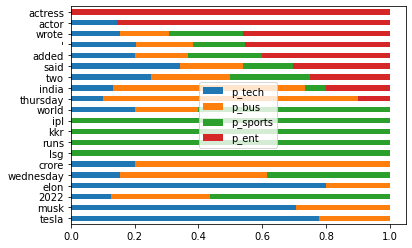

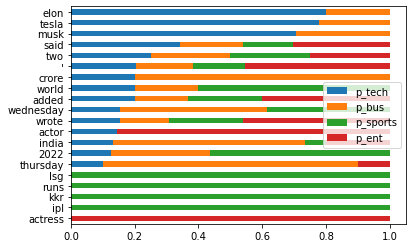

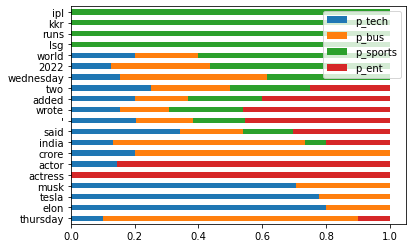

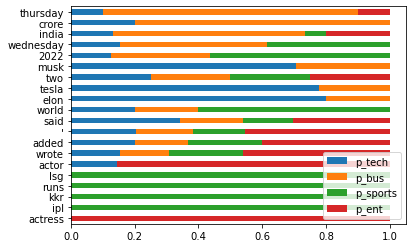

In [48]:
news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_ent')\
                        .plot.barh(stacked=True)
                        

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_tech')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_sports')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_bus')\
                        .plot.barh(stacked=True)

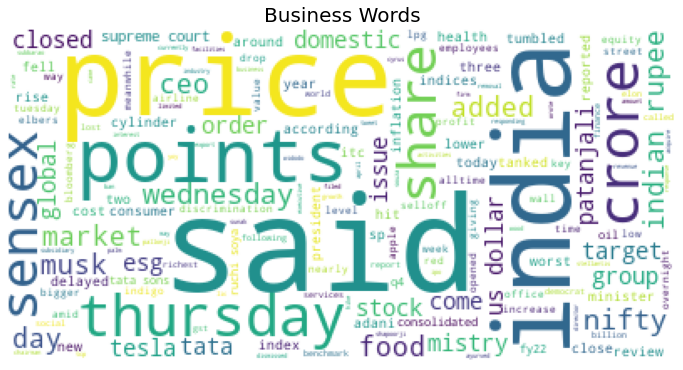

In [49]:
# Word Clouds, business
img = WordCloud(background_color='white').generate(bus_news)
plt.figure(figsize=(12,8))
plt.title('Business Words', fontsize=20)
plt.imshow(img)
plt.axis('off')
plt.show()

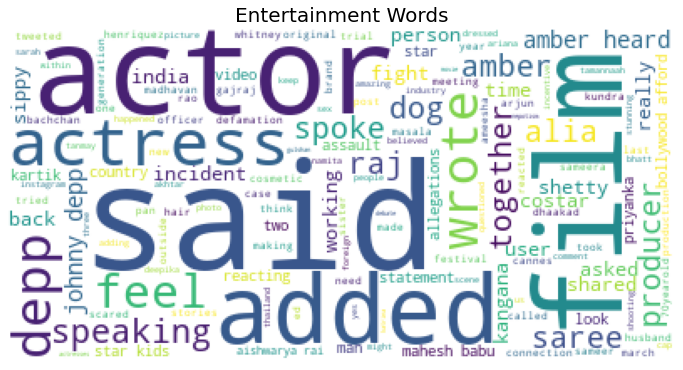

In [50]:
# Word Clouds Entertainment
img = WordCloud(background_color='white').generate(ent_news)
plt.figure(figsize=(12,8))
plt.title('Entertainment Words', fontsize=20)
plt.imshow(img)
plt.axis('off')
plt.show()

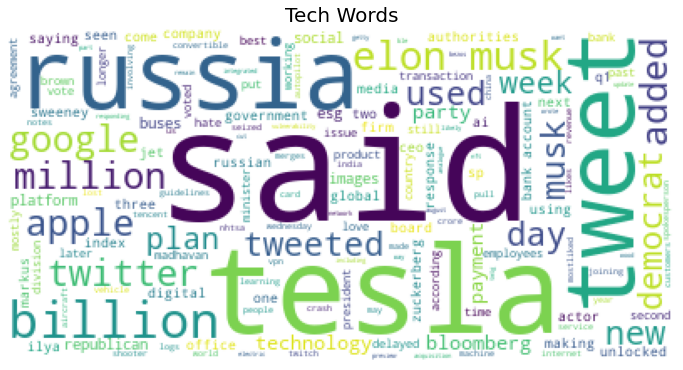

In [51]:
# Word Cloud Tech
img = WordCloud(background_color='white').generate(tech_news)
plt.figure(figsize=(12,8))
plt.title('Tech Words', fontsize=20)
plt.imshow(img)
plt.axis('off')
plt.show()

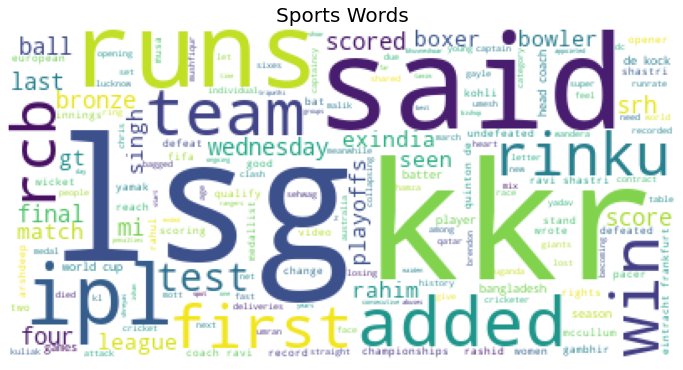

In [52]:
# Sports
img = WordCloud(background_color='white').generate(sports_news)
plt.figure(figsize=(12,8))
plt.title('Sports Words', fontsize=20)
plt.imshow(img)
plt.axis('off')
plt.show()

In [64]:
all_blogs = ' '.join(blogs.clean)

In [65]:
blog_freq = pd.Series(all_blogs.split()).value_counts()

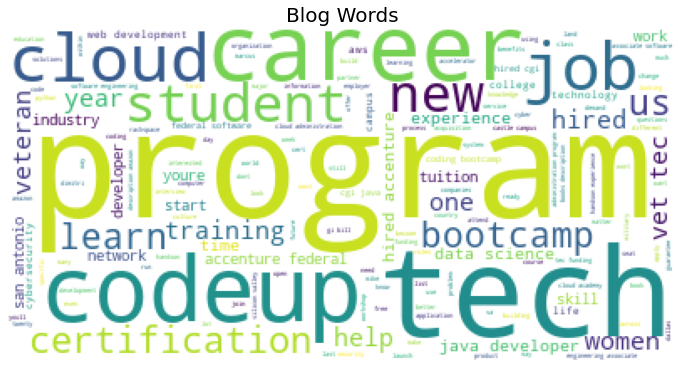

In [66]:
# Word Cloud
img = WordCloud(background_color='white').generate(all_blogs)
plt.figure(figsize=(12,8))
plt.title('Blog Words', fontsize=20)
plt.imshow(img)
plt.axis('off')
plt.show()

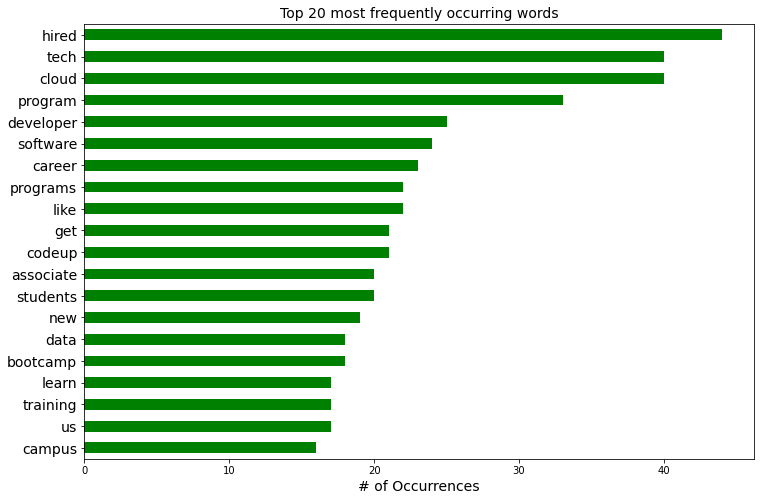

In [68]:
top_20 = blog_freq.head(20)
top_20.sort_values().plot.barh(color='green',
                                     figsize=(12,8))
plt.title('Top 20 most frequently occurring words', fontsize=14)
plt.xlabel('# of Occurrences', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [69]:
# Some bigrams
bigrams = list(nltk.ngrams(all_blogs.split(), 2))
bigrams = ['_'.join(bi) for bi in bigrams]
bigram_freq = pd.Series(bigrams).value_counts()

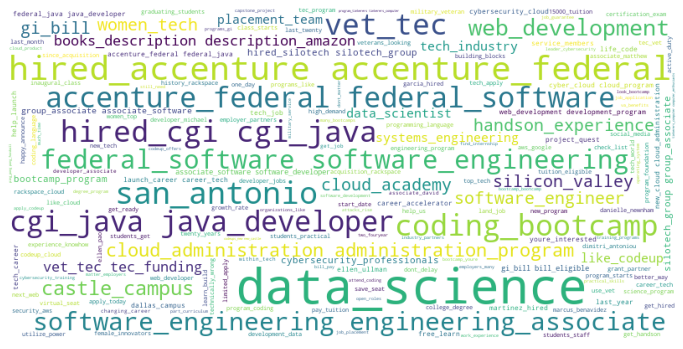

In [70]:
img = WordCloud(background_color='white', width=800, height=400).generate(' '.join(bigrams))
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis('off')
plt.show()